Import Libraries for NLP

In [85]:
from pyspark.sql import functions, SparkSession
from pyspark.ml.clustering import LDA
from pyspark.ml.feature import Tokenizer, RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import length



Import transcript files ######(importing all files from txt to one df!!)

In [88]:
df = pd.read_excel("transcripts/Interview_1_transcript.xlsx")
df.columns = ["id", "text"]
pdf = pd.DataFrame(df)

type(pdf)
pdf.head(6)


FileNotFoundError: [Errno 2] No such file or directory: 'transcripts/Interview_1_transcript.xlsx'

Cleaning Data Files (https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [69]:
#drop index 
pdf = pdf.drop(columns=["id"])
pdf.head(6)

,text
0,"1: Also, ich bin auch schon in Holland sehr en..."
1,"2: Darf ich da gleich einhaken Haken, wenn wir..."
2,"1: also auf jeden Fall Transparenz, es gibt vi..."
3,2: wie wichtig ist es denn für den Nutzer jetz...
4,"1: Ja, das ist sehr wichtig , denn es passiere..."
5,"2: Und was war denn da jetzt der Gegenwert, we..."


In [70]:
# Remove punctuation
pdf['text'] = \
pdf['text'].map(lambda x: re.sub('[,\.!?:12]', '', x))

# Convert the titles to lowercase
pdf['text'] = \
pdf['text'].map(lambda x: x.lower())

# Print out the first rows of papers
pdf['text'].head()
pdf

,text
0,also ich bin auch schon in holland sehr eng b...
1,darf ich da gleich einhaken haken wenn wir je...
2,also auf jeden fall transparenz es gibt viele...
3,wie wichtig ist es denn für den nutzer jetzt ...
4,ja das ist sehr wichtig denn es passieren ma...
...,...
85,es wäre schön wenn es daneben geht denn ohne ...
86,ja und ich glaube das kann man auch nicht ga...
87,ja das ist auch eine gute idee aber das kommt...
88,kann auch spaß machen perfekt vielen vielen d...


Analysing Data

Wordcloud

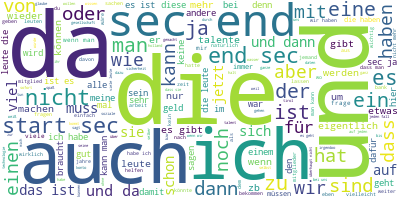

In [71]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(pdf['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Tokenization

In [73]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover

pdf
tokenizer = RegexTokenizer(inputCol="text", outputCol="tokens", pattern="\\W+", minTokenLength=4, toLowercase=True)
tokenized = tokenizer.transform(sdf)

display(tokenized)

DataFrame[id: bigint, text: string, tokens: array<string>]

Remove Stopwords

In [74]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = sdf.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'DataFrame' object has no attribute 'values'

LDA